<a href="https://colab.research.google.com/github/nikhil2312/Fashion-mnist/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() # loading the fashion mnist dataset

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

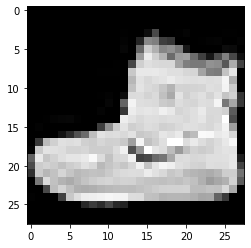

In [14]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

In [17]:
X_train = X_train.astype('float32') / 255 # normalization so that the values lie between 0 and 1
X_valid = X_valid.astype('float32') / 255

In [18]:
X_test = X_test.astype('float32') / 255

In [19]:
X_train.shape, X_valid.shape, X_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [22]:
X_train = X_train.reshape(-1, 28, 28, 1) # reshaping it ti (-1,28,28,1) because it's a gray scale image and it has only one channel
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [23]:
X_train.shape, X_valid.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [29]:
y_train = np_utils.to_categorical(y_train, num_classes=10) # converting the outpt to categorical form. ie: 5 = [0,0,0,0,0,1,0,0,0,0], 3 = [0,0,0,1,0,0,0,0,0,0]
y_valid = np_utils.to_categorical(y_valid, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [30]:
y_train.shape, y_valid.shape, y_test.shape

((48000, 10), (12000, 10), (10000, 10))

In [42]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [34]:
model = Sequential([                                                                                                              # initializing model as a sequential model
                    Conv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1], activation='relu', padding='same'),  # conv2D layer to pick the necessary features
                    MaxPool2D(pool_size=2), # MaxPool2D to down sample so that it prevents over fitting
                    Conv2D(filters = 128, kernel_size=3, activation='relu', padding='same'), # padding to make sure the dimensionality remains the same
                    Conv2D(filters = 128, kernel_size=3, activation='relu', padding='same'), # relu for activation
                    MaxPool2D(pool_size=2),
                    Conv2D(filters = 256, kernel_size=3, activation='relu', padding='same'),
                    Conv2D(filters = 256, kernel_size=3, activation='relu', padding='same'),
                    MaxPool2D(pool_size=2),
                    Flatten(), # flatten to make it a 1D array
                    Dense(128, activation='relu'), # dense layer for classification 
                    Dropout(0.5), # dropout layer to prevent over-fitting
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax') # softmax because we have a categorical output
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)        

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [37]:
from keras.callbacks import ModelCheckpoint

In [39]:
cb = ModelCheckpoint('try_1', monitor='val_accuracy', save_best_only=True)

In [40]:
train = history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[cb])

Epoch 1/30
1500/1500 [==============================] - 88s 28ms/step - loss: 1.1256 - accuracy: 0.5848 - val_loss: 0.4192 - val_accuracy: 0.8410
INFO:tensorflow:Assets written to: try_1/assets
Epoch 2/30
1500/1500 [==============================] - 44s 29ms/step - loss: 0.4589 - accuracy: 0.8435 - val_loss: 0.3275 - val_accuracy: 0.8813
INFO:tensorflow:Assets written to: try_1/assets
Epoch 3/30
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3722 - accuracy: 0.8691 - val_loss: 0.2982 - val_accuracy: 0.8889
INFO:tensorflow:Assets written to: try_1/assets
Epoch 4/30
1500/1500 [==============================] - 36s 24ms/step - loss: 0.3303 - accuracy: 0.8852 - val_loss: 0.2845 - val_accuracy: 0.8966
INFO:tensorflow:Assets written to: try_1/assets
Epoch 5/30
1500/1500 [==============================] - 47s 31ms/step - loss: 0.3012 - accuracy: 0.8938 - val_loss: 0.2720 - val_accuracy: 0.8992
INFO:tensorflow:Assets written to: try_1/assets
Epoch 6/30
1500/1500 [========

In [45]:
model = load_model('try_1')
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2956 - accuracy: 0.9108


[0.29555004835128784, 0.9107999801635742]